<a href="https://colab.research.google.com/github/leesiri1004/Colab/blob/main/1_5_KowepsTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2021/02/01
이름 : 이슬이
내용 : Koweps 통계자료 데이터분석 실습하기
"""

In [ ]:
# 패키지 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 불러오기
df_koweps = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file/koweps_2015.csv', encoding='cp949')
df_koweps

,Unnamed: 0,h10_id,h10_ind,h10_sn,h10_merkey,h_new,h10_cobf,h10_reg5,h10_reg7,h10_din,h10_cin,h10_flag,p10_wgl,p10_wsl,p10_wgc,p10_wsc,h10_hc,nh1001_1,nh1001_2,h1001_1,h10_pind,h10_pid,h10_g1,h10_g2,h10_g3,h10_g4,h10_g6,h10_g7,h10_g8,h10_g9,h10_g10,h10_g11,h10_g12,h1001_110,h1001_5aq1,h1001_5aq2,h1001_5aq3,h1001_5aq4,h10_med1,h10_med2,...,c1005_4aq7,c1005_4aq8,c1005_4aq9,c1005_4aq10,c1005_4aq11,c1005_4aq12,c1005_4aq13,c1005_4aq14,c1005_4aq15,c1007_4aq1,c1007_4aq2,c1007_7aq1,c1007_7aq2,c1007_7aq3,c1007_4aq3,c1007_4aq4,c1007_4aq5,c1007_4aq6,c1007_4aq7,c1007_4aq8,c1007_4aq9,c1007_4aq10,c1007_4aq11,c1007_4aq12,c1007_4aq13,c1007_4aq14,c1007_4aq15,c1007_4aq16,c1007_4aq17,c1007_4aq18,c1007_4aq19,c1007_4aq20,c1007_4aq21,c1007_4aq22,c1007_4aq23,h10_pers_income1,h10_pers_income2,h10_pers_income3,h10_pers_income4,h10_pers_income5
0,1,1,1,1,10101,0.0,NaN,1,1,864.0,864.0,0,776.994676,0.256780,763.718940,0.252392,2,NaN,NaN,1,1,101,1,10,2,1936,2,0,0,0,2,2,1,1,0,0,0,0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,2,2,1,1,20101,0.0,NaN,1,1,600.0,600.0,0,959.645799,0.317142,949.229127,0.313699,2,NaN,NaN,1,1,201,1,10,2,1945,4,5,0,0,2,2,1,1,0,0,0,0,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,3,3,1,1,30101,0.0,NaN,1,1,1571.0,1619.0,0,1059.155878,0.350028,1047.659052,0.346228,1,NaN,NaN,1,1,301,1,10,1,1948,3,5,0,0,2,2,1,1,0,0,0,0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1440.0,NaN,0.0,NaN
3,4,4,1,1,40101,0.0,NaN,1,1,3579.0,3687.0,0,1012.159859,0.334496,991.572052,0.327693,1,NaN,NaN,2,1,401,1,10,1,1942,7,3,0,0,3,1,1,5,0,0,0,0,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2400.0,NaN,0.0,NaN
4,5,4,1,1,40101,0.0,NaN,1,1,3579.0,3687.0,0,1075.421227,0.355403,1057.046575,0.349330,1,NaN,NaN,2,4,402,2,2,2,1923,2,0,0,0,2,1,1,5,0,0,0,0,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16659,16660,9800,7,1,98000701,1.0,NaN,4,5,9764.0,11600.0,0,536.438289,0.177281,525.204519,0.173568,1,NaN,NaN,6,7,980002,2,20,2,1967,5,5,0,0,1,1,1,5,0,0,0,0,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
16660,16661,9800,7,1,98000701,1.0,NaN,4,5,9764.0,11600.0,0,687.109009,0.227074,679.650644,0.224609,1,NaN,NaN,6,7,980003,3,11,2,1992,5,5,0,0,5,1,1,5,0,0,0,0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3630.0,NaN,NaN,0.0,NaN
16661,16662,9800,7,1,98000701,1.0,NaN,4,5,9764.0,11600.0,0,1262.031602,0.417073,1248.332620,0.412546,1,NaN,NaN,6,7,980004,4,12,1,1995,5,5,0,0,5,1,1,5,0,0,0,0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700.0,NaN,0.0,NaN
16662,16663,9800,7,1,98000701,1.0,NaN,4,5,9764.0,11600.0,0,578.446752,0.191164,572.167883,0.189089,1,NaN,NaN,6,7,980005,5,13,2,1998,5,1,0,0,0,1,1,5,0,0,0,0,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [ ]:
# 지역별 인구분석
#1: 서울, 2:수도권(경기도/인천), 3:부산/경남, 4:대구/경북, 5:강원/충북, 6:광주/전남/전북/제주
df_reg1 = df_koweps[df_koweps.h10_reg7 == 1].h10_reg7
df_reg2 = df_koweps[df_koweps.h10_reg7 == 2].h10_reg7
df_reg3 = df_koweps[df_koweps.h10_reg7 == 3].h10_reg7
df_reg4 = df_koweps[df_koweps.h10_reg7 == 4].h10_reg7
df_reg5 = df_koweps[df_koweps.h10_reg7 == 5].h10_reg7
df_reg6 = df_koweps[df_koweps.h10_reg7 == 6].h10_reg7
df_reg7 = df_koweps[df_koweps.h10_reg7 == 7].h10_reg7

print('1 : ', df_reg1.count())
print('2 : ', df_reg2.count())
print('3 : ', df_reg3.count())
print('4 : ', df_reg4.count())
print('5 : ', df_reg5.count())
print('6 : ', df_reg6.count())
print('7 : ', df_reg7.count())

1 :  2486
2 :  3711
3 :  2785
4 :  2036
5 :  1467
6 :  1257
7 :  2922


In [ ]:
# 나이대 별 파생변수 생성
df_age = df_koweps.loc[:, ['h10_g4', 'h10_g11']]
df_age['age'] = 2021 - df_age.h10_g4

df_age.loc[(df_age.age >= 0) & (df_age.age < 10), 'gen'] = 0
df_age.loc[(df_age.age >= 10) & (df_age.age < 20), 'gen'] = 10
df_age.loc[(df_age.age >= 20) & (df_age.age < 30), 'gen'] = 20
df_age.loc[(df_age.age >= 30) & (df_age.age < 40), 'gen'] = 30
df_age.loc[(df_age.age >= 40) & (df_age.age < 50), 'gen'] = 40
df_age.loc[(df_age.age >= 50) & (df_age.age < 60), 'gen'] = 50
df_age.loc[(df_age.age >= 60) & (df_age.age < 70), 'gen'] = 60
df_age.loc[(df_age.age >= 70) & (df_age.age < 80), 'gen'] = 70
df_age.loc[(df_age.age >= 80) & (df_age.age < 90), 'gen'] = 80
df_age.loc[(df_age.age >= 90) & (df_age.age < 100), 'gen'] = 90

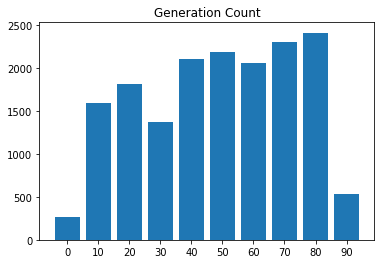

In [ ]:
# 나이대별 카운터 집계 및 시각화
g0 = df_age[df_age.gen == 0].gen.count()
g10 = df_age[df_age.gen == 10].gen.count()
g20 = df_age[df_age.gen == 20].gen.count()
g30 = df_age[df_age.gen == 30].gen.count()
g40 = df_age[df_age.gen == 40].gen.count()
g50 = df_age[df_age.gen == 50].gen.count()
g60 = df_age[df_age.gen == 60].gen.count()
g70 = df_age[df_age.gen == 70].gen.count()
g80 = df_age[df_age.gen == 80].gen.count()
g90 = df_age[df_age.gen == 90].gen.count()

plt.title('Generation Count')
plt.bar(['0','10','20','30','40','50','60','70','80','90'],
        [g0,g10,g20,g30,g40,g50,g60,g70,g80,g90])
plt.show()